El conjunto de datos de precios de viviendas de Boston consta de 506 observaciones y 14 atributos (incluido el objetivo). A continuación, se describen las variables del conjunto de datos en español:

* **CRIM:** Tasa de criminalidad per cápita por ciudad.
* **ZN**: Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados (aprox. 2322.5 metros cuadrados).
* **INDUS**: Proporción de acres comerciales no minoristas por ciudad.
* **CHAS**: Variable ficticia de Charles River (= 1 si la casa limita con el río; 0 en caso contrario).
* **NOX**: Concentración de óxidos nítricos (partes por 10 millones).
* **RM**: Número promedio de habitaciones por vivienda.
* **AGE**: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
* **DIS**: Distancias ponderadas a cinco centros de empleo de Boston.
* **RAD**: Índice de accesibilidad a carreteras radiales.
* **TAX**: Tasa de impuesto a la propiedad de valor total por cada $10,000.
* **PTRATIO**: Proporción alumno-profesor por ciudad.
* **B**: 1000(Bk - 0.63)^2, donde Bk es la proporción de personas de ascendencia afroamericana por ciudad.
* **LSTAT**: Porcentaje de población de menor estatus (proporción de adultos sin educación secundaria y trabajadores no especializados).
* **PRICE**: Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares. Este es el valor objetivo que queremos predecir.

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
# Definir los nombres de las columnas según la descripción del dataset
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

# Leer el archivo con espacios como separador
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, delim_whitespace=True, names=column_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Análisis exploratorio de datos (EDA)
print("\nAnálisis exploratorio de datos:")

# Visualizar las primeras filas del dataset
print("\nPrimeras filas del dataset:")
print(df.head())


Análisis exploratorio de datos:

Primeras filas del dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [ ]:
# Estadísticas descriptivas del dataset
print("Estadísticas descriptivas del dataset:")
print(df.describe())


Estadísticas descriptivas del dataset:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  35

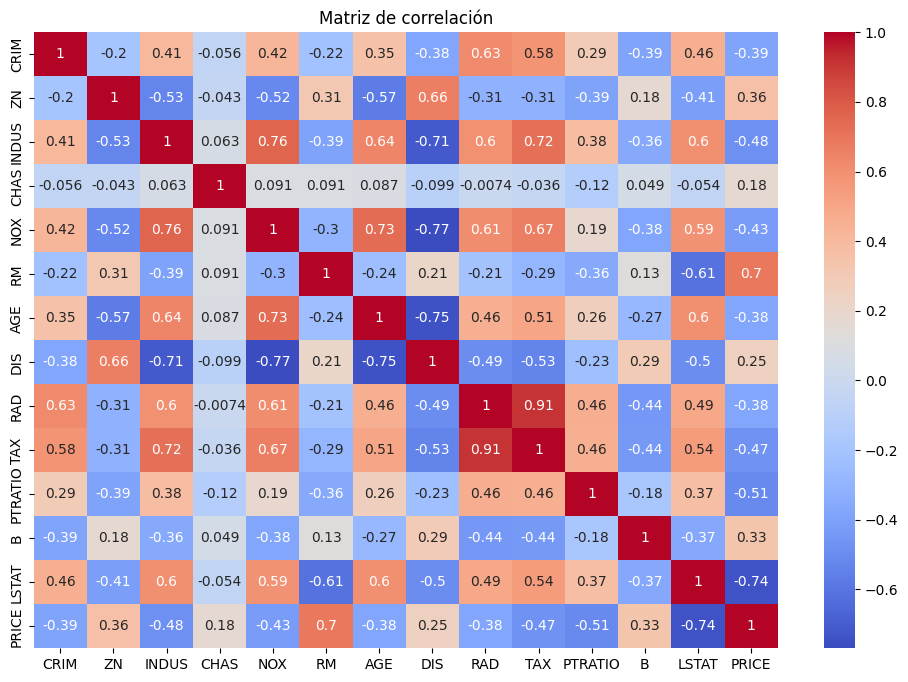

In [ ]:
# Visualizar la correlación entre las variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()



In [ ]:
#Definimos las variables X e y

X = df.drop('PRICE', axis=1) 
y = df.PRICE

In [ ]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# SVM para clasificación
# Crear un target binario (si el precio es mayor o igual a la mediana, será 1, de lo contrario, será 0)
y_train_binary = (y_train >= np.median(y)).astype(int)
y_test_binary = (y_test >= np.median(y)).astype(int)


###  1: Entrenar un clasificador SVM con kernel lineal

In [ ]:
#COMPLETAR



### 2: Entrenar un clasificador SVM con kernel RBF


In [ ]:
#COMPLETAR


SVC(C=1)

### Ejercicio 3: Evaluar ambos clasificadores SVM en términos de precisión y matriz de confusión


Precisión SVM Lineal: 0.8725490196078431
Matriz de confusión SVM Lineal:
 [[50  8]
 [ 5 39]]

Precisión SVM RBF: 0.9117647058823529
Matriz de confusión SVM RBF:
 [[53  5]
 [ 4 40]]


### Ejercicio 4: Entrenar un regresor SVR con kernel lineal


SVR(C=1, kernel='linear')

###5: Entrenar un regresor SVR con kernel RBF


SVR(C=1)

### Ejercicio 6: Evaluar ambos regresores SVR en términos de RMSE y R2


RMSE SVR Lineal: 5.377594506061095
R2 SVR Lineal: 0.6056589279132574

RMSE SVR RBF: 5.0664129005042655
R2 SVR RBF: 0.6499766059760035



# Ejercicio 7: Realizar una búsqueda en la cuadrícula de hiperparámetros para optimizar el regresor SVR



